In [13]:
import pandas as pd
import os

In [14]:
data = pd.read_csv('Data TX.csv')
data.head()

,Unnamed: 0,Port Name,State,Port Code,Border,Date,Measure,Value
0,49,Boquillas,TX,2410,US-Mexico Border,2/1/2020 00:00,Pedestrians,3036
1,66,Brownsville,TX,2301,US-Mexico Border,2/1/2020 00:00,Bus Passengers,3072
2,67,Brownsville,TX,2301,US-Mexico Border,2/1/2020 00:00,Buses,469
3,68,Brownsville,TX,2301,US-Mexico Border,2/1/2020 00:00,Pedestrians,232880
4,69,Brownsville,TX,2301,US-Mexico Border,2/1/2020 00:00,Personal Vehicle Passengers,638585


In [15]:
data['Date'] = pd.to_datetime(data['Date'])
data

,Unnamed: 0,Port Name,State,Port Code,Border,Date,Measure,Value
0,49,Boquillas,TX,2410,US-Mexico Border,2020-02-01,Pedestrians,3036
1,66,Brownsville,TX,2301,US-Mexico Border,2020-02-01,Bus Passengers,3072
2,67,Brownsville,TX,2301,US-Mexico Border,2020-02-01,Buses,469
3,68,Brownsville,TX,2301,US-Mexico Border,2020-02-01,Pedestrians,232880
4,69,Brownsville,TX,2301,US-Mexico Border,2020-02-01,Personal Vehicle Passengers,638585
...,...,...,...,...,...,...,...,...
36753,355449,Brownsville,TX,2301,US-Mexico Border,1996-01-01,Trucks,19168
36754,355456,Hidalgo,TX,2305,US-Mexico Border,1996-01-01,Personal Vehicles,487872
36755,355465,Progreso,TX,2309,US-Mexico Border,1996-01-01,Rail Containers Full,0
36756,355484,Hidalgo,TX,2305,US-Mexico Border,1996-01-01,Rail Containers Empty,0


In [16]:
data['Year'] = data['Date'].dt.year

In [17]:
data['Month'] = data['Date'].dt.month
data.head()

,Unnamed: 0,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month
0,49,Boquillas,TX,2410,US-Mexico Border,2020-02-01,Pedestrians,3036,2020,2
1,66,Brownsville,TX,2301,US-Mexico Border,2020-02-01,Bus Passengers,3072,2020,2
2,67,Brownsville,TX,2301,US-Mexico Border,2020-02-01,Buses,469,2020,2
3,68,Brownsville,TX,2301,US-Mexico Border,2020-02-01,Pedestrians,232880,2020,2
4,69,Brownsville,TX,2301,US-Mexico Border,2020-02-01,Personal Vehicle Passengers,638585,2020,2


In [18]:
data_2020 = data.loc[(data['Year']==2020)]
data_2020.to_csv()
data_2020.head()

,Unnamed: 0,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month
0,49,Boquillas,TX,2410,US-Mexico Border,2020-02-01,Pedestrians,3036,2020,2
1,66,Brownsville,TX,2301,US-Mexico Border,2020-02-01,Bus Passengers,3072,2020,2
2,67,Brownsville,TX,2301,US-Mexico Border,2020-02-01,Buses,469,2020,2
3,68,Brownsville,TX,2301,US-Mexico Border,2020-02-01,Pedestrians,232880,2020,2
4,69,Brownsville,TX,2301,US-Mexico Border,2020-02-01,Personal Vehicle Passengers,638585,2020,2


In [19]:
results = data_2020.groupby('Port Name').sum()
results.head()

,Unnamed: 0,Port Code,Value,Year,Month
Port Name,,,,,
Boquillas,874,4820,5621,4040,3
Brownsville,10087,50622,2706529,44440,33
Del Rio,6552,27624,733715,24240,18
Eagle Pass,12925,50666,1693839,44440,33
El Paso,14335,55246,6291390,46460,35


Text(0.5, 0, 'Border Port')

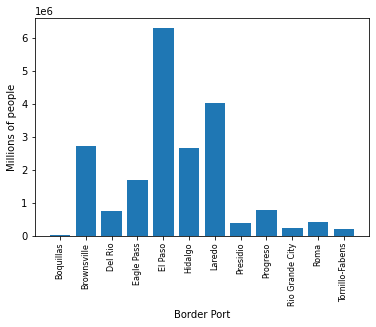

In [20]:
import matplotlib.pyplot as plt

ports = [port for port, df in data_2020.groupby('Port Name')]

plt.bar(ports,results['Value'])
plt.xticks(ports, rotation='vertical',size=8)
plt.ylabel('Millions of people')
plt.xlabel('Border Port')

In [21]:
data_19 = data.loc[(data['Year']==2019)]
data_19

,Unnamed: 0,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month
180,1552,Brownsville,TX,2301,US-Mexico Border,2019-12-01,Bus Passengers,4668,2019,12
181,1562,Eagle Pass,TX,2303,US-Mexico Border,2019-12-01,Bus Passengers,8525,2019,12
182,1563,El Paso,TX,2402,US-Mexico Border,2019-12-01,Bus Passengers,39745,2019,12
183,1567,Hidalgo,TX,2305,US-Mexico Border,2019-12-01,Bus Passengers,26540,2019,12
184,1572,Laredo,TX,2304,US-Mexico Border,2019-12-01,Bus Passengers,81239,2019,12
...,...,...,...,...,...,...,...,...,...,...
1274,11080,El Paso,TX,2402,US-Mexico Border,2019-01-01,Pedestrians,582606,2019,1
1275,11091,Rio Grande City,TX,2307,US-Mexico Border,2019-01-01,Truck Containers Empty,713,2019,1
1276,11105,Tornillo-Fabens,TX,2404,US-Mexico Border,2019-01-01,Personal Vehicle Passengers,62957,2019,1
1277,11107,Brownsville,TX,2301,US-Mexico Border,2019-01-01,Personal Vehicle Passengers,844406,2019,1


In [31]:
results19 = data_19.groupby('Month').sum()
results19

,Unnamed: 0,Port Code,Value,Year
Month,,,,
1,975634,212086,11292749,183729
2,907460,212086,9832915,183729
3,855379,216690,11292719,187767
4,768566,212086,9654087,183729
5,708139,212086,10318909,183729
6,624686,221310,10662331,191805
7,535523,212086,10625477,183729
8,462212,212086,10575120,183729
9,392313,214288,10275486,185748


In [22]:
data_18 = data.loc[(data['Year']==2018)]
data_18

,Unnamed: 0,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month
1279,11148,Brownsville,TX,2301,US-Mexico Border,2018-12-01,Trucks,18678,2018,12
1280,11149,Del Rio,TX,2302,US-Mexico Border,2018-12-01,Pedestrians,14207,2018,12
1281,11156,Brownsville,TX,2301,US-Mexico Border,2018-12-01,Personal Vehicle Passengers,910576,2018,12
1282,11167,Brownsville,TX,2301,US-Mexico Border,2018-12-01,Rail Containers Full,722,2018,12
1283,11182,Eagle Pass,TX,2303,US-Mexico Border,2018-12-01,Rail Containers Full,13577,2018,12
...,...,...,...,...,...,...,...,...,...,...
2363,20656,Brownsville,TX,2301,US-Mexico Border,2018-01-01,Personal Vehicles,392983,2018,1
2364,20664,Rio Grande City,TX,2307,US-Mexico Border,2018-01-01,Personal Vehicles,32720,2018,1
2365,20665,Eagle Pass,TX,2303,US-Mexico Border,2018-01-01,Rail Containers Empty,14909,2018,1
2366,20672,Brownsville,TX,2301,US-Mexico Border,2018-01-01,Rail Containers Empty,7398,2018,1


In [28]:
results18 = data_18.groupby('Month').sum()
results18

,Unnamed: 0,Port Code,Value,Year
Month,,,,
1,1825232,209676,10757921,181620
2,1757853,209676,9932379,181620
3,1688757,209676,11687905,181620
4,1631891,212086,11029841,183638
5,1557216,212086,11345867,183638
6,1487063,212086,10703961,183638
7,1409432,212086,11631635,183638
8,1338183,212086,11460689,183638
9,1265893,212086,10714936,183638


Text(0.5, 1.0, 'People crossing TX borders in 2019')

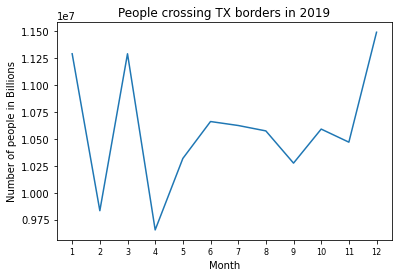

In [32]:
import matplotlib.pyplot as plt

Months = [value for value, df in data_19.groupby('Month')]

plt.plot(Months,results19['Value'])
plt.ylabel('Number of people in Billions')
plt.xlabel('Month')
plt.xticks(Months,size=8)
plt.title('People crossing TX borders in 2019')

Text(0.5, 1.0, 'People crossing TX borders in 2018')

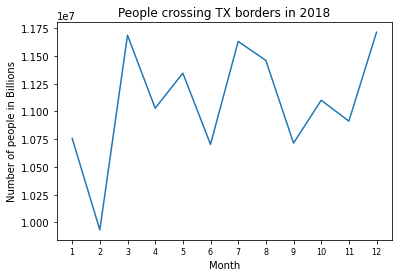

In [33]:
import matplotlib.pyplot as plt

plt.plot(Months,results18['Value'])
plt.ylabel('Number of people in Billions')
plt.xlabel('Month')
plt.xticks(Months,size=8)
plt.title('People crossing TX borders in 2018')


In [35]:
data_17 = data.loc[(data['Year']==2017)]

In [37]:
results17 = data_17.groupby('Month').sum()

Text(0.5, 1.0, 'People crossing TX borders in 2018')

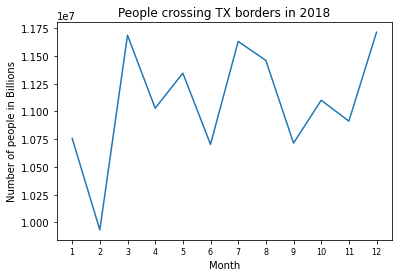

In [38]:
import matplotlib.pyplot as plt

plt.plot(Months,results18['Value'])
plt.ylabel('Number of people in Billions')
plt.xlabel('Month')
plt.xticks(Months,size=8)
plt.title('People crossing TX borders in 2018')


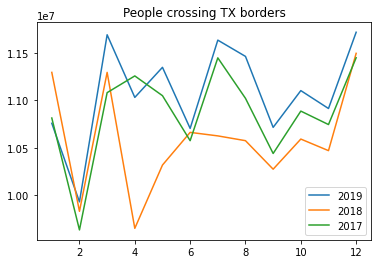

In [41]:
import matplotlib.pyplot as plt
import numpy as np
Months = [value for value, df in data_19.groupby('Month')]


fig = plt.figure()
ax = plt.subplot(111)
ax.plot(Months,results18['Value'], label='2019')
ax.plot(Months,results19['Value'], label='2018')
ax.plot(Months,results17['Value'], label='2017')
plt.title('People crossing TX borders')

ax.legend()
plt.show()

In [36]:
data_19.describe()

,Unnamed: 0,Port Code,Value,Year,Month
count,1099.000000,1099.000000,1.099000e+03,1099.0,1099.000000
mean,6337.907188,2330.356688,1.156371e+05,2019.0,6.494086
std,2806.789017,43.244509,2.454971e+05,0.0,3.446800
min,1552.000000,2301.000000,1.000000e+00,2019.0,1.000000
25%,3977.500000,2303.000000,1.875500e+03,2019.0,3.500000
50%,6362.000000,2305.000000,1.527200e+04,2019.0,6.000000
75%,8648.500000,2402.000000,9.196700e+04,2019.0,9.000000
max,11114.000000,2410.000000,1.825166e+06,2019.0,12.000000


In [61]:
import re
import pandas as pd
import numpy as np

# Continous Graph 2000-2020

In [64]:
data2020 = data.loc[(data['Year'] == 2010) & (data['Year'] == 2011) &(data['Year'] == 2012) & (data['Year'] == 2013) &(data['Year'] == 2014) & (data['Year'] == 2015) & (data['Year'] == 2016) & (data['Year'] == 2017) & (data['Year'] == 2018) & (data['Year'] == 2019)]
data2020 = data2020.to_csv('2010-2020.csv')

In [65]:
cols = list(data2020.columns)

AttributeError: 'NoneType' object has no attribute 'columns'